# Attrition in HR Predictions:Gradual loss of an employees over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df=pd.read_csv("HR_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape # it is having 1470 rows and 35 columns

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values present in the dataset

In [6]:
#lets separate categorical and numerical predictors
categorical=df.select_dtypes(include=[np.object])
print('categorical features:',categorical.shape[1])
numerical=df.select_dtypes(include=[np.float64,np.int64])
print('numerical features:',numerical.shape[1])

categorical features: 9
numerical features: 26


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The min age is 18 so we can say all the employees are above 18...here we can drop one column by checking categories of over18

In [8]:
#checking unique values and value counts in categorical data
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [10]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [11]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [12]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [13]:
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [14]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [15]:
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [16]:
# checking skewness
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

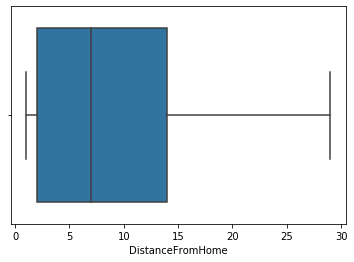

In [17]:
#checking outliers
sns.boxplot(df['DistanceFromHome'])

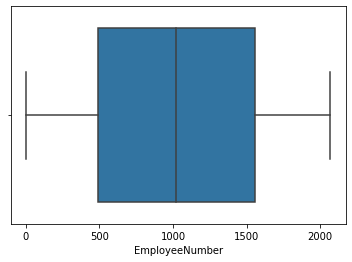

In [18]:
sns.boxplot(df['EmployeeNumber'])

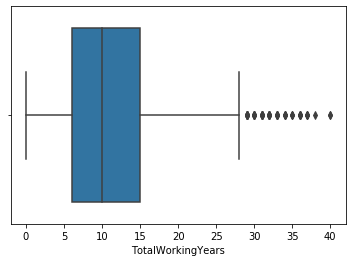

In [19]:
sns.boxplot(df['TotalWorkingYears'])

In [20]:
#lets replace yes and no in attrition with 1 and 0
n_val={'Yes':1,'No':0}
df['Attrition']=df['Attrition'].apply(lambda x:n_val[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


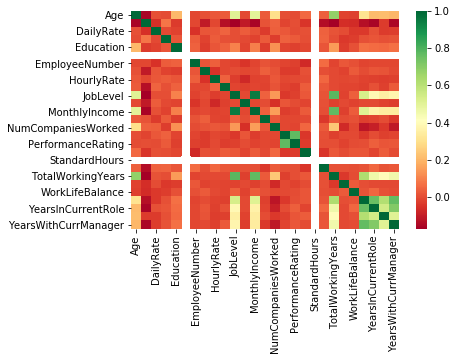

In [21]:
#checking correlation with heatmap
top_cor_features=df.corr()
sns.heatmap(top_cor_features,cmap="RdYlGn")

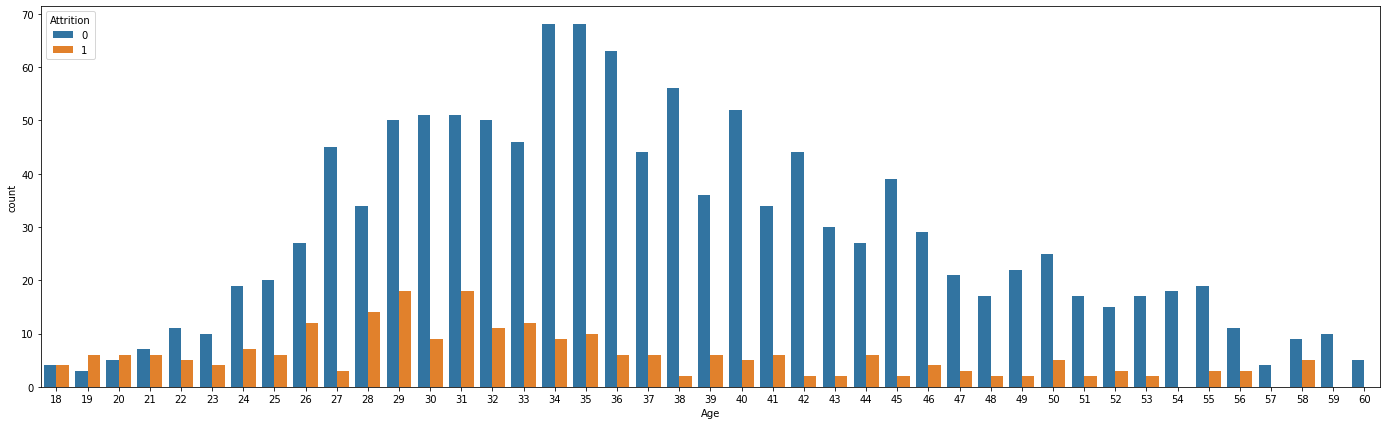

In [22]:
#Data Analysis
plt.figure(figsize=(24,7))
sns.countplot(x='Age',data=df,hue='Attrition')

from the age group 28,29 and 31 are most likely to leave

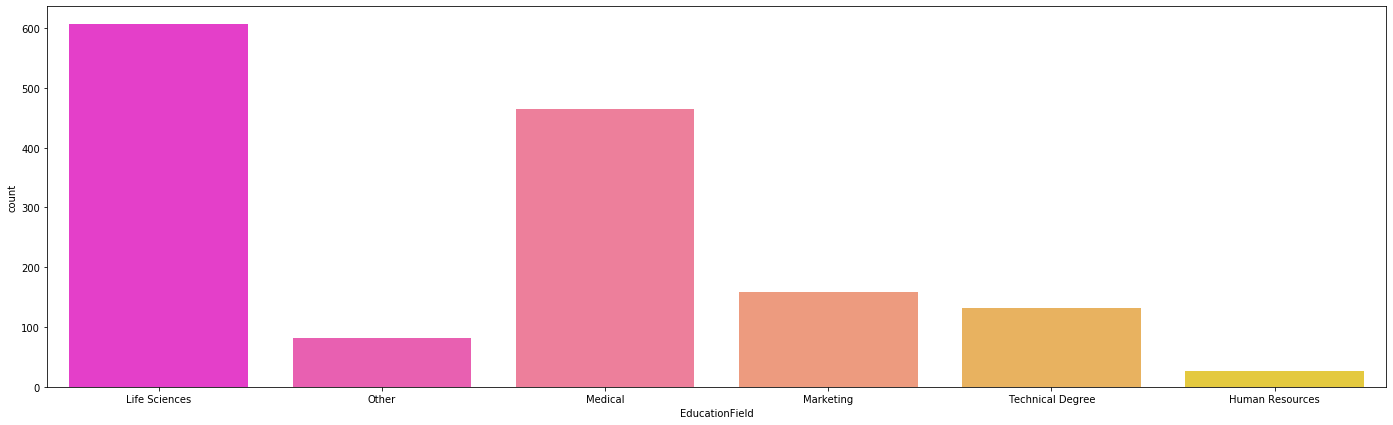

In [23]:
plt.figure(figsize=(24,7))
sns.countplot('EducationField',data=df,palette='spring')

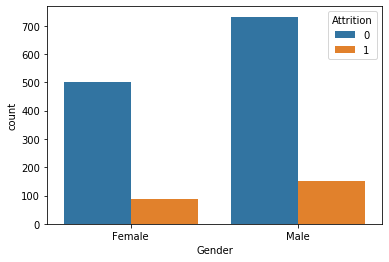

In [24]:
sns.countplot(data=df,x='Gender',hue='Attrition')

attrition level in female is less than male

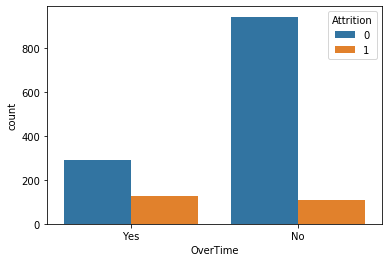

In [25]:
sns.countplot(data=df,x='OverTime',hue='Attrition')

employees with overtime are more likely to leave

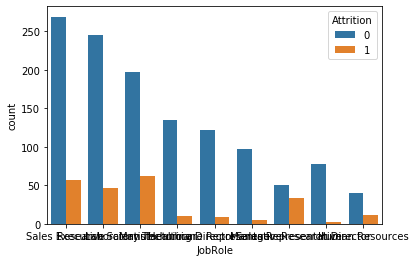

In [26]:
sns.countplot(data=df,x='JobRole',hue='Attrition')

job roles are also affecting the attrition

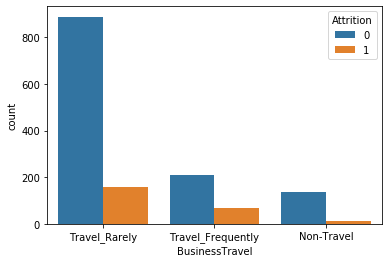

In [27]:
sns.countplot(data=df,x='BusinessTravel',hue='Attrition')

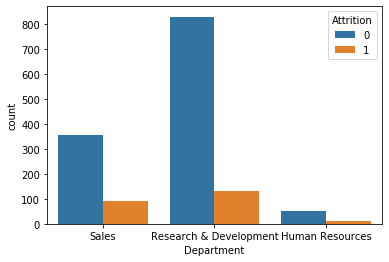

In [28]:
sns.countplot(data=df,x='Department',hue='Attrition')

R and D Department employees are most likely to leave 

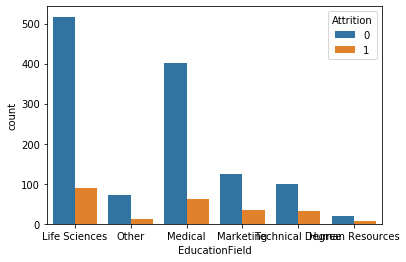

In [29]:
sns.countplot(data=df,x='EducationField',hue='Attrition')

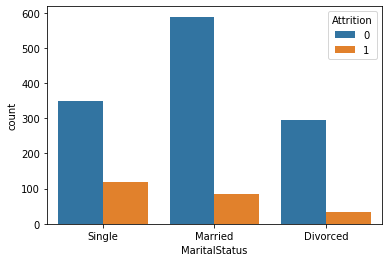

In [30]:
sns.countplot(data=df,x='MaritalStatus',hue='Attrition')

most of the single employees are going to leave

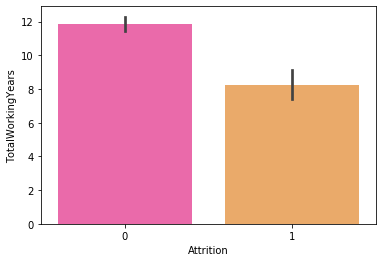

In [31]:

sns.barplot(y='TotalWorkingYears',x='Attrition',data=df,palette='spring')

Attrition is there if the total working years are less

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
#converting categorical into numerical forms using label encoder
list=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    df[i]=lb.fit_transform(df[i])

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
df.shape

(1470, 35)

In [36]:
#dropping some columns those are having single category and no predictive values
df.drop(columns=['EmployeeCount','Over18','EmployeeNumber','StandardHours'],inplace=True)

In [37]:
df.shape

(1470, 31)

In [38]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [39]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [40]:
df_new=df[(z<3).all (axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [41]:
df_new.shape

(1387, 31)

# MODEL BUILDING

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [43]:
x=df_new.drop(columns='Attrition').values
y=df_new['Attrition']

In [44]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39)

In [45]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [46]:
#Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

Accuracy score 0.8776978417266187
confusion_matrix [[223   4]
 [ 30  21]]
classification_report               precision    recall  f1-score   support

           0       0.88      0.98      0.93       227
           1       0.84      0.41      0.55        51

    accuracy                           0.88       278
   macro avg       0.86      0.70      0.74       278
weighted avg       0.87      0.88      0.86       278



In [47]:
#cross validation
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(lg,x,y,cv=5)
print(lrscores)
print(lrscores.mean())

[0.8381295  0.84172662 0.84476534 0.83754513 0.84115523]
0.8406643638158066


scores are same for model with cross validation...we can say model is working fine

In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_predrfc))
print('confusion_matrix',confusion_matrix(y_test,y_predrfc))
print('classification_report',classification_report(y_test,y_predrfc))

Accuracy score 0.841726618705036
confusion_matrix [[225   2]
 [ 42   9]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.99      0.91       227
           1       0.82      0.18      0.29        51

    accuracy                           0.84       278
   macro avg       0.83      0.58      0.60       278
weighted avg       0.84      0.84      0.80       278



In [49]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8129496402877698
[[206  21]
 [ 31  20]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       227
           1       0.49      0.39      0.43        51

    accuracy                           0.81       278
   macro avg       0.68      0.65      0.66       278
weighted avg       0.80      0.81      0.80       278



HYPERPARAMETER TUNNING

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.001,0.01,0.1,1,10,100,1000]}
clf=GridSearchCV(LogisticRegression(penalty='l2'),param_grid)
clf

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
clf.fit(x_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [52]:
print(clf.best_params_)

{'C': 0.1}


In [53]:
lgr=LogisticRegression(C=0.1)
lgr.fit(x_train,y_train)
pred_y=lgr.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred_y))
print('confusion_matrix',confusion_matrix(y_test,pred_y))
print('classification_report',classification_report(y_test,pred_y))


Accuracy score 0.8741007194244604
confusion_matrix [[225   2]
 [ 33  18]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.99      0.93       227
           1       0.90      0.35      0.51        51

    accuracy                           0.87       278
   macro avg       0.89      0.67      0.72       278
weighted avg       0.88      0.87      0.85       278



In [54]:
df1=pd.DataFrame(pred_y)
df1.to_csv("attrition.csv")

In [55]:
#lets save a model
from sklearn.externals import joblib
joblib.dump(lg,'HR_Attrition.pkl')

['HR_Attrition.pkl']